# 最急降下法

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import product
from sklearn.linear_model import LinearRegression

In [2]:
#データのインポート
df = pd.read_csv('dataset/sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   space   10 non-null     int64  
 1   rent    10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [4]:
df.describe()

,space,rent
count,10.000000,10.000000
mean,49.300000,20.647403
std,27.219478,7.924547
min,20.000000,11.533805
25%,28.500000,14.719202
50%,43.500000,19.162677
75%,60.250000,22.940848
max,103.000000,37.565129


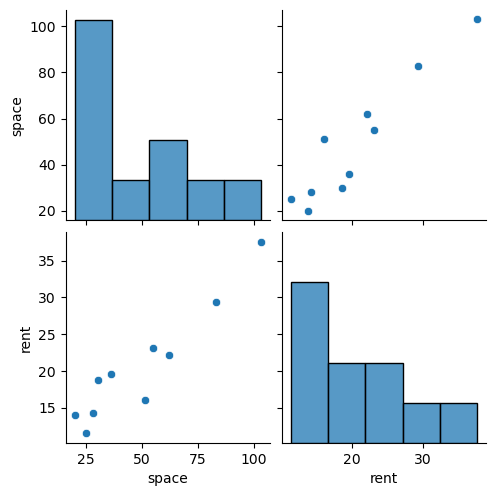

In [5]:
sns.pairplot(df)

## 損失関数の定義

In [6]:
#列を取ってきて、Numpyに変換
x = df['space'].values
y = df['rent'].values

#損失関数の定義
def cost_func(theta_0,theta_1,x,y):
    
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))

cost_func(5,7,x=x,y=y)

138703.20244638805

In [7]:
cost_func(0.5,0.7,x=x,y=y)

332.9377090377085

## 損失関数の可視化

In [8]:
n0 = n1 = 300

min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1
theta_0 = np.linspace(min_0,max_0 , n0)
theta_1 =np.linspace(min_1,max_1 , n1)
theta_0_ax,theta_1_ax = np.meshgrid(theta_0,theta_1)
z = [cost_func(param[0],param[1],x=x,y=y) for param in list(product(theta_0,theta_1))]
z = np.array(z).reshape(n0,n1)

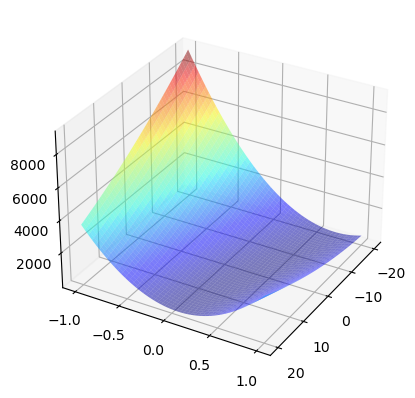

In [9]:
ax = plt.axes(projection = '3d')
ax.plot_surface(theta_0_ax.T,theta_1_ax.T,z,cmap = 'jet',alpha = 0.5)
ax.view_init(elev=30,azim=30)

## 最急降下法

In [10]:
#初期値
#np.random.seed(0)
#theta_0_init = np.random.uniform(min_0,max_0)
#theta_1_init = np.random.uniform(min_1,max_1)


theta_0_init = -5
theta_1_init = -0.5

#関数の定義
def update_theta0(theta_0, theta_1, x, y, alpha = 0.05):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x)- y)

def update_theta1(theta_0, theta_1, x, y, alpha = 0.05):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []

#初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

#thetaを同時に更新していく
for _ in range(epochs):
    updated_theta_0 = update_theta0(theta_0_hist[-1],theta_1_hist[-1],x = x,y=y,alpha=alpha)
    updated_theta_1 = update_theta1(theta_0_hist[-1],theta_1_hist[-1],x = x,y=y,alpha=alpha)
    theta_0_hist.append(updated_theta_0)
    theta_1_hist.append(updated_theta_1)
    

In [11]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


# 結果の描画

In [12]:
cost_hist = [cost_func(*param, x = x,y=y) for param in zip(theta_0_hist, theta_1_hist)]

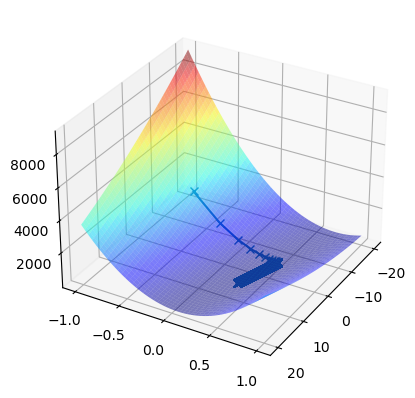

In [13]:
ax = plt.axes(projection = '3d')
ax.plot(theta_0_hist,theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T,theta_1_ax.T,z,cmap = 'jet',alpha = 0.5)
ax.view_init(elev=30,azim=30)

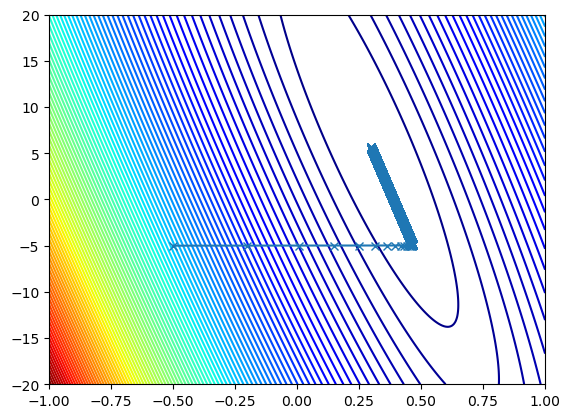

In [14]:
plt.contour(theta_1_ax.T, theta_0_ax.T, z, 100, cmap='jet')
plt.plot(theta_1_hist,theta_0_hist,'x-')

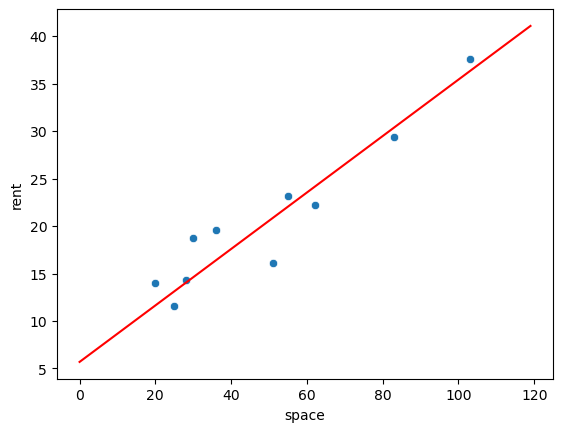

In [15]:
sns.scatterplot(x = 'space',y= 'rent',data=df)
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1] * x_values
plt.plot(x_values, y_values,'-',color='r')

## 正規方程式

In [17]:
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103])

In [18]:
y

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

In [25]:
X =np.vstack([np.ones(len(x)), x]).T

In [27]:
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

In [28]:
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)

In [29]:
best_theta

array([7.0962325 , 0.27487161])

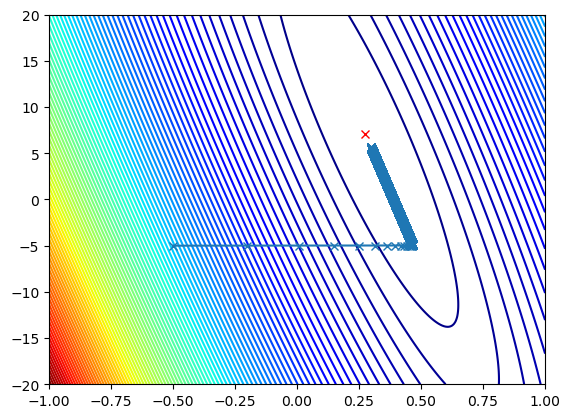

In [34]:
plt.contour(theta_1_ax.T, theta_0_ax.T, z, 100, cmap='jet')
plt.plot(theta_1_hist,theta_0_hist,'x-')
plt.plot(best_theta[1],best_theta[0],'x',color = 'red')

## scikit-learnで線形回帰

In [50]:
model = LinearRegression()

#データの準備
x = df['space'].values
y = df['rent'].values
X = x.reshape(-1,1)

#モデルの学習
model.fit(X,y)

LinearRegression()

In [51]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [54]:
#coefficent 係数
model.coef_

array([0.27487161])

In [53]:
#intercept 係数
model.intercept_

7.0962324999088295